<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Units-of-computer-storage" data-toc-modified-id="Units-of-computer-storage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Units of computer storage</a></span></li><li><span><a href="#Storage-of-Characters" data-toc-modified-id="Storage-of-Characters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Storage of Characters</a></span></li><li><span><a href="#Integers:-fixed-point-number-system" data-toc-modified-id="Integers:-fixed-point-number-system-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Integers: fixed-point number system</a></span><ul class="toc-item"><li><span><a href="#Unsigned-integers" data-toc-modified-id="Unsigned-integers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Unsigned integers</a></span></li><li><span><a href="#Signed-integers" data-toc-modified-id="Signed-integers-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Signed integers</a></span></li><li><span><a href="#BigInt" data-toc-modified-id="BigInt-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><code>BigInt</code></a></span></li><li><span><a href="#Overflow-in-integer-arithmetic" data-toc-modified-id="Overflow-in-integer-arithmetic-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Overflow in integer arithmetic</a></span></li></ul></li><li><span><a href="#Real-numbers:-floating-point-number-system" data-toc-modified-id="Real-numbers:-floating-point-number-system-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Real numbers: floating-point number system</a></span><ul class="toc-item"><li><span><a href="#Half-precision-(Float16)" data-toc-modified-id="Half-precision-(Float16)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Half precision (Float16)</a></span></li><li><span><a href="#Single-precision-(Float32)" data-toc-modified-id="Single-precision-(Float32)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Single precision (Float32)</a></span></li><li><span><a href="#Double-precision-(Float64)" data-toc-modified-id="Double-precision-(Float64)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Double precision (Float64)</a></span></li><li><span><a href="#Special-floating-point-numbers" data-toc-modified-id="Special-floating-point-numbers-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Special floating-point numbers</a></span></li><li><span><a href="#Rounding" data-toc-modified-id="Rounding-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Rounding</a></span></li><li><span><a href="#Errors" data-toc-modified-id="Errors-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Errors</a></span></li><li><span><a href="#Machine-epsilons" data-toc-modified-id="Machine-epsilons-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Machine epsilons</a></span></li><li><span><a href="#Machine-precision" data-toc-modified-id="Machine-precision-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Machine precision</a></span></li><li><span><a href="#Overflow-and-underflow-of-floating-point-number" data-toc-modified-id="Overflow-and-underflow-of-floating-point-number-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Overflow and underflow of floating-point number</a></span></li></ul></li><li><span><a href="#Catastrophic-cancellation" data-toc-modified-id="Catastrophic-cancellation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Catastrophic cancellation</a></span><ul class="toc-item"><li><span><a href="#Algebraic-laws" data-toc-modified-id="Algebraic-laws-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Algebraic laws</a></span></li></ul></li><li><span><a href="#Coditioning" data-toc-modified-id="Coditioning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Coditioning</a></span></li><li><span><a href="#Further-readings" data-toc-modified-id="Further-readings-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Further readings</a></span></li><li><span><a href="#Acknowledgment" data-toc-modified-id="Acknowledgment-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Acknowledgment</a></span></li></ul></div>

In [1]:
versioninfo()

Julia Version 1.6.2
Commit 1b93d53fc4 (2021-07-14 15:36 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)


In [2]:
using Pkg
Pkg.activate("../..")
Pkg.status()

  Activating

      Status `C:\Users\User\Project.toml` (empty project)


 new environment at `C:\Users\User\Project.toml`


# Computer arithmetics

## Units of computer storage

Humans use decimal digits (why?) 손가락이 10개기 때문\
Computers use binary digits (why?) 전기가 들어왔다 on,off로 생각(switch) \
    

* *Bit* = binary digit (coined by statistician [John Tukey](https://en.wikipedia.org/wiki/Bit#History)).  
* *byte* = 8 bits.
* KB = kilobyte = $10^3$ bytes; KiB = kibibyte = $2^{10}$ bytes.  
* MB = megabyte = $10^6$ bytes; MiB = mebibyte = $2^{20}$ bytes.
* GB = gigabyte = $10^9$ bytes. Typical RAM size.  
* TB = terabyte = $10^{12}$ bytes. Typical hard drive size. Size of NYSE each trading session.    
* PB = petabyte = $10^{15}$ bytes.  
* EB = exabyte = $10^{18}$ bytes. Size of all healthcare data in 2011 is ~150 EB.    
* ZB = zetabyte = $10^{21}$ bytes. 

Julia function `Base.summarysize` shows the amount of memory (in bytes) used by an object.

In [1]:
x = rand(100, 100)
Base.summarysize(x) # 쓰는 메모리 양

80040

`varinfo()` function prints all variables in workspace and their sizes.

In [2]:
varinfo() # similar to Matlab whos()

| name |       size | summary                 |
|:---- | ----------:|:----------------------- |
| Base |            | Module                  |
| Core |            | Module                  |
| Main |            | Module                  |
| x    | 78.164 KiB | 100×100 Matrix{Float64} |


## Storage of Characters

* Plain text files are stored in the form of characters: `.jl`, `.r`, `.c`, `.cpp`, `.ipynb`, `.html`, `.tex`, ...  
* ASCII (American Code for Information Interchange): 7 bits, only $2^7=128$ characters.  

In [7]:
# integers 0, 1, ..., 127 and corresponding ascii character
[0:127 Char.(0:127)]

128×2 Matrix{Any}:
   0  '\0'
   1  '\x01'
   2  '\x02'
   3  '\x03'
   4  '\x04'
   5  '\x05'
   6  '\x06'
   7  '\a'
   8  '\b'
   9  '\t'
  10  '\n'
  11  '\v'
  12  '\f'
   ⋮  
 116  't'
 117  'u'
 118  'v'
 119  'w'
 120  'x'
 121  'y'
 122  'z'
 123  '{'
 124  '|'
 125  '}'
 126  '~'
 127  '\x7f'

* Extended ASCII: 8 bits, $2^8=256$ characters.  

In [6]:
# integers 128, 129, ..., 255 and corresponding extended ascii character
# show(STDOUT, "text/plain", [128:255 Char.(128:255)])
[128:255 Char.(128:255)]

128×2 Matrix{Any}:
 128  '\u80'
 129  '\u81'
 130  '\u82'
 131  '\u83'
 132  '\u84'
 133  '\u85'
 134  '\u86'
 135  '\u87'
 136  '\u88'
 137  '\u89'
 138  '\u8a'
 139  '\u8b'
 140  '\u8c'
   ⋮  
 244  'ô'
 245  'õ'
 246  'ö'
 247  '÷'
 248  'ø'
 249  'ù'
 250  'ú'
 251  'û'
 252  'ü'
 253  'ý'
 254  'þ'
 255  'ÿ'

* Unicode: UTF-8, UTF-16 and UTF-32 support many more characters including foreign characters; last 7 digits conform to ASCII. 

* [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the current dominant character encoding on internet.  

<img src="./unicode.png" width="800" align="center"/>

Source: [Google Blog](https://googleblog.blogspot.com/2012/02/unicode-over-60-percent-of-web.html)

* Julia supports the full range of UTF-8 characters. You can type many Unicode math symbols by typing the backslashed LaTeX symbol name followed by tab. 

In [7]:
# \beta-<tab>
β = 0.0
# \beta-<tab>-\hat-<tab>
β̂ = 0.0

0.0

* For a table of unicode symbols that can be entered via tab completion of LaTeX-like abbreviations: <https://docs.julialang.org/en/v1.1/manual/unicode-input/#Unicode-Input-1>

## Integers: fixed-point number system

* Fixed-point number system is a computer model for integers $\mathbb{Z}$. 
    - **Remember** that computer memory is finite whereas the cardinality of $\mathbb{Z}$ is (countably) infinite.
    - *Any* representation of numbers in computer *has to be* an approximation.

* The number $M$ of bits and method of representing negative numbers vary from system to system. 
    - The `integer` type in R has $M=32$ (packages such as ‘bit64’support 64 bit integers). 
        + <https://www.r-bloggers.com/r-in-a-64-bit-world/>
    - C has (`unsigned`) `char`, `int`, `short`, `long` (and `long long`), whose sizes depend on the machine.
    - Matlab has `(u)int8`, `(u)int16`, `(u)int32`, `(u)int64`.  

* Julia has even more integer types: 

In [9]:
# 정수는 무수히 많음... 그럼 무한개를 컴퓨터에 저장해놔야함?
# 그건 불가능... 근사를 이용
# M=64 : 최대로 처리할 수 있는 비트 수가 2^64개

# Pkg.add("GraphRecipes")

    Updating registry at `C:\Users\User\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed DataAPI ───────────────────── v1.8.0
   Installed EarCut_jll ────────────────── v2.2.3+0
   Installed RecipesBase ───────────────── v1.1.2
   Installed GeometryBasics ────────────── v0.3.13
   Installed OffsetArrays ──────────────── v1.10.6
   Installed ArnoldiMethod ─────────────── v0.1.0
   Installed GraphRecipes ──────────────── v0.5.7
   Installed Colors ────────────────────── v0.12.8
   Installed SimpleTraits ──────────────── v0.9.4
   Installed Tables ────────────────────── v1.5.1
   Installed TableTraits ───────────────── v1.0.1
   Installed Inflate ───────────────────── v0.1.2
   Installed Ratios ────────────────────── v0.4.1
   Installed OrderedCollections ────────── v1.4.1
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed ChainRulesCore ────────────── v1.4.0
   Installed StaticArray

  ✓ GeometryBasics
  ✓ NetworkLayout
  ✓ PlotUtils
  ✓ GraphRecipes
  38 dependencies successfully precompiled in 103 seconds (5 already precompiled)


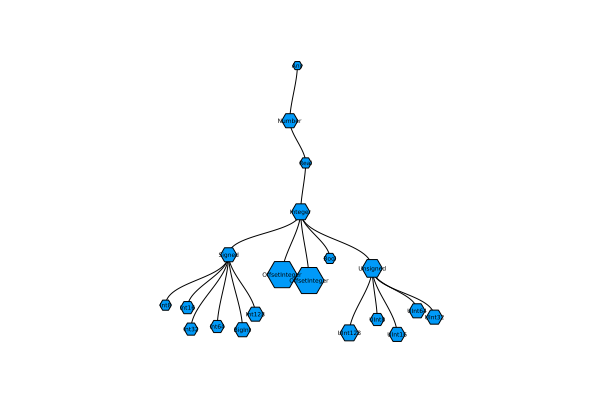

In [11]:
using GraphRecipes, Plots

gr(size=(600, 400))
theme(:default)

plot(Integer, method=:tree, fontsize=4)

source: [Visualizing Graphs in Julia using Plots and PlotRecipes](http://www.breloff.com/Graphs/)

### Unsigned integers

* Model for $\mathbb{N} \cup \{0\}$.
* For unsigned integers, the range is $[0,2^M-1]$.
* Julia functions `typemin(T)` and `typemax(T)` give the lowest and highest representable number of a type `T` respectively

In [9]:
for t in [UInt8, UInt16, UInt32, UInt64, UInt128]
    println(t, '\t', typemin(t), '\t', typemax(t))
end

UInt8	0	255
UInt16	0	65535
UInt32	0	4294967295
UInt64	0	18446744073709551615
UInt128	0	340282366920938463463374607431768211455


### Signed integers

* Model of $\mathbb{Z}$. Can do subtraction.

* First bit ("most significant bit" or MSB) is the sign bit.  
    - `0` for nonnegative numbers
    - `1` for negative numbers  

In [ ]:
# 8을 나타낼 때, 8bits 사용 시, 
# unsigned : 8 = 00001000
# Q. -8 = ??  : 10001000 with signed? Nope.
# 둘을 더했을 때 0이 되지 않는다.

# 그럼 어떻게 나타내냐? "2의 보수법" 사용

* **Two's complement representation** for negative numbers. 
    - Set the sign bit to 1  
    - Negate (`0`->`1`, `1`->`0`) the remaining bits
    - Add to `1` to the result  
    - Two's complement representation of a negative integer $x$ is the same as the unsigned integer $2^M - x$.

In [ ]:
# M=0(8bits)라 가정하자.

# 1. sign bit = 1 로 만든다.           -> 10001000
# 2. 나머지 1을 0으로, 0을 1로 바꿔준다.    -> 11110111
# 3. 마지막으로 1을 더해준다.              -> 11111000

# 한 마디로 정리하면, 2^M - x = 256 - 8 = 248 를 unsigned integer로 나타내 준 것.
# (8_10=00001000 과 더하면 0이됨을 알 수 있다.)
# = 0000_1000 + 1111_1000 = 1_0000_0000 -> 0000_0000 (9th bit 무시한다.)
# 10진수로 나타내면, 8 + (256-8) = 256
# 8bits 에서 256 = 0 과 같다.
# 257=1, 258=2 (모듈러 연산)
# -8 = (mod 256)

In [22]:
@show typeof(5)
@show bitstring(5) # 64자리 2진수
@show bitstring(-5)
@show bitstring(UInt64(Int128(2)^64 - 5)) == bitstring(-5) # unsigned 와의 관계
@show bitstring(2 * 5) # shift bits of 5 to the left
@show bitstring(2 * -5); # shift bits of -5 to left

typeof(5) = Int64
bitstring(5) = "0000000000000000000000000000000000000000000000000000000000000101"
bitstring(-5) = "1111111111111111111111111111111111111111111111111111111111111011"
bitstring(UInt64(Int128(2) ^ 64 - 5)) == bitstring(-5) = true
bitstring(2 * 5) = "0000000000000000000000000000000000000000000000000000000000001010"
bitstring(2 * -5) = "1111111111111111111111111111111111111111111111111111111111110110"


* Two's complement representation respects modular arithmetic nicely.  
    Addition of any two signed integers are just bitwise addition, possibly modulo $2^M$
    - $M=4$ case: mod 16 연산
    
<img src="http://users.dickinson.edu/~braught/courses/cs251f02/classes/images/twosCompWheel.png" width="400" align="center"/>    

Source: [Signed Binary Numbers, Subtraction and Overflow](http://users.dickinson.edu/~braught/courses/cs251f02/classes/notes07.html) by Grant Braught

* **Range** of representable integers by $M$-bit **signed integer** is $[-2^{M-1},2^{M-1}-1]$:

In [ ]:
# When M=4, 4-bit signed interger : [-8, 7] 

In [11]:
typemin(Int64), typemax(Int64)

(-9223372036854775808, 9223372036854775807)

In [12]:
for T in [Int8, Int16, Int32, Int64, Int128]
    println(T, '\t', typemin(T), '\t', typemax(T))
end

Int8	-128	127
Int16	-32768	32767
Int32	-2147483648	2147483647
Int64	-9223372036854775808	9223372036854775807
Int128	-170141183460469231731687303715884105728	170141183460469231731687303715884105727


### `BigInt`

Julia `BigInt` type is arbitrary precision.

In [13]:
@show typemax(Int128)
@show typemax(Int128) + 1 # overflow!
@show BigInt(typemax(Int128)) + 1;

typemax(Int128) = 170141183460469231731687303715884105727
typemax(Int128) + 1 = -170141183460469231731687303715884105728
BigInt(typemax(Int128)) + 1 = 170141183460469231731687303715884105728


In [ ]:
# 가장 큰 정수에 1 더해주면 overflow!

### Overflow in integer arithmetic

R reports `NA` for integer overflow.
**Julia outputs the result according to modular arithmetic.**

In [ ]:
# R 에서는 overflow가 일어나면 NA를 준다.
# Julia 에서는 모듈러 연산을 통해 값을 리턴한다.

In [23]:
@show typemax(Int32)
@show typemax(Int32) + Int32(1); # modular arithmetics!

typemax(Int32) = 2147483647
typemax(Int32) + Int32(1) = -2147483648


In [24]:
using RCall
# The largest integer R can hold
R"""
.Machine$integer.max 
"""
# R은 기본적으로 32bits

RObject{IntSxp}
[1] 2147483647


In [26]:
R"""
M <- 32
big <- 2^(M-1) - 1
as.integer(big)
"""

RObject{IntSxp}
[1] 2147483647


In [27]:
# overflow 발생 시 NA리턴
R"""
as.integer(big+1)
"""

┌ Warning: RCall.jl: 경고: NAs introduced by coercion to integer range
└ @ RCall /Users/user5/.julia/packages/RCall/iMDW2/src/io.jl:160


RObject{IntSxp}
[1] NA


## Real numbers: floating-point number system

Floating-point number system is a computer model for the real line $\mathbb{R}$.

* Most computer systems adopt the [IEEE 754 standard](https://en.wikipedia.org/wiki/IEEE_floating_point), established in 1985, for floating-point arithmetics.  
For the history, see an [interview with William Kahan](http://www.cs.berkeley.edu/~wkahan/ieee754status/754story.html).

* In the scientific notation, a real number is represented as
$$
\pm d_1.d_2d_3 \cdots d_p \times b^e, \quad 0 \le d_i < b.
$$
Humans use the _base_ $b=10$ and _digits_ $d_i=0, 1, \dotsc, 9$.\
    In computer, the base is $b=2$ and the digits $d_i$ are 0 or 1. The *exponent* $e$ is between $e_{\min}$ and $e_{\max}$.

* **Normalized** vs **denormalized** numbers. For example, decimal number 18 is
$$ +1.0010 \times 2^4 \quad (\text{normalized})$$
or, equivalently,
$$ +0.1001 \times 2^5 \quad (\text{denormalized}).$$

* In the floating-number system, computer stores 
    - sign bit  
    - the _fraction_ (or _mantissa_, or _significand_) of the **normalized** representation (except some special cases)
    - the actual exponent plus a *bias*
        + Because $e_{\min}$ is likely negative and $e_{\max}$ is positive, the exponent requires a sign. IEEE 754 handles the sign of the exponent by subtracting the bias from the value of the exponent evaluated as an unsigned integer.

In [32]:
# 유효숫자 표기법
# why normalized? 최대의 유효숫자 수를 확보하기 위함

# sign bit(1)
# fraction(p-1) : d_1 ~ d_p & normalized 사용
    # 64-bit 안에 `b`도 저장해야하나? No. b=2로 정해져있음
    # fraction을 저장하기 위한 비트 수? : (p-1) bits, d_1 != 0 이기 때문 (normalized)
# exponent : e_min, e_max 가 정해져야 함 -> `bias`를 이용


* Julia provides `Float16` (half precision, implemented in software using `Float32`), `Float32` (single precision), `Float64` (double precision), and `BigFloat` (arbitrary precision).

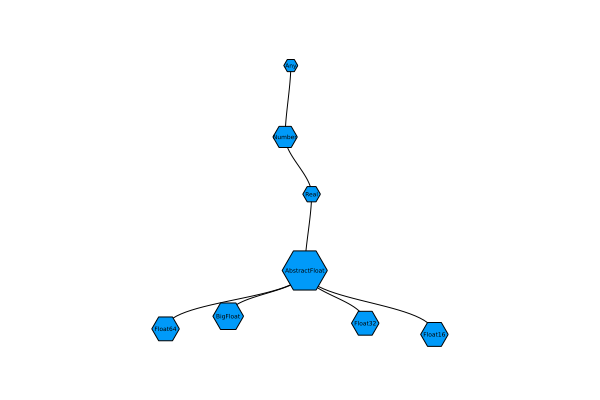

In [30]:
using GraphRecipes, Plots

#pyplot(size=(800, 600))
gr(size=(600, 400))
theme(:default)

plot(AbstractFloat, method=:tree, fontsize=4)

### Half precision (Float16)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/IEEE_754r_Half_Floating_Point_Format.svg/350px-IEEE_754r_Half_Floating_Point_Format.svg.png" width="300" align="center"/>

Source: <https://en.wikipedia.org/wiki/Half-precision_floating-point_format>
    
- In Julia, `Float16` is the type for half precision numbers.

- MSB is the sign bit.  

- 10 significand bits (**fraction**=**mantissa**), hence $p=11$ (why?)

- 5 exponent bits: $e_{\max}=15$, $e_{\min}=-14$, **bias**=15 = $01111_2$ for encoding:
    + $e_{\min} = \mathbf{00001_2} - 01111_2 = -14_{10}$
    + $e_{\max} = \mathbf{11110_2} - 01111_2 = 15_{10}$

- $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 4}$ in decimal because $\log_{10} (2^{15}) \approx 4$.  

- **Precision**: $\log_{10}2^{11} \approx 3.311$ decimal digits. 

$$
(value) = (-1)^{b_{15}}\times 2^{(\sum_{j=1}^5 b_{15-j}2^{5-j}) - 15} \times \left( 1 + \sum_{i=1}^{10}\frac{b_{10-i}}{2^i}\right)
$$

In [ ]:
## In half precision, 16-bit
# 각각에 할당된 비트 수는 사전에 정해진 것.
# sign bit
# exponent : 2^5=32 개의 정수 표현가능
    # bias = 15  (2^M-1 로 정해지는 듯 하다... just 내 생각)
    # unsigned 로 생각했을 때, 가장 작은 수가 e_min, 가장 큰 수가 e_max
    # e_min = 00001_2, e_max = 11110_2
    # 근데 32개 쓸 수 있다며? 0,32는 특별한 용도를 위해 아껴둠
# fraction : p=11 why? d_2 ~ d_11 을 저장할 수 있음


In [19]:
println("Half precision:")
@show bitstring(Float16(5)) # 5 in half precision
@show bitstring(Float16(-5)); # -5 in half precision

Half precision:
bitstring(Float16(5)) = "0100010100000000"
bitstring(Float16(-5)) = "1100010100000000"


In [31]:
# sign : 0 양수
# exponent : 10001 = 17 -> 17-15(bias) = 2
# fraction : 01만 사용한다고 생각 -> 1.01

$5 = 1.01 \times 2^2$ 가 0_10001_0100000000<br>
$-5 = -1.01 \times 2^2$ 가 1_10001_0100000000 로 표현

### Single precision (Float32)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Float_example.svg/1180px-Float_example.svg.png" width="600" align="center"/>

Source: <https://en.wikipedia.org/wiki/Single-precision_floating-point_format>

- In Julia, `Float32` is the type for single precision numbers.  

- MSB is the sign bit.  

- 23 significand bits ($p=24$).  

- 8 exponent bits: $e_{\max}=127$, $e_{\min}=-126$, **bias**=127.  

- $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 38}$ in decimal because $\log_{10} (2^{127}) \approx 38$.

- **precision**: $\log_{10}(2^{24}) \approx 7.225$ decimal digits.  

In [20]:
println("Single precision:")
@show bitstring(Float32(5)) # 5 in single precision
@show bitstring(Float32(-5)); # -5 in single precision

Single precision:
bitstring(Float32(5)) = "01000000101000000000000000000000"
bitstring(Float32(-5)) = "11000000101000000000000000000000"


### Double precision (Float64)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/IEEE_754_Double_Floating_Point_Format.svg/1236px-IEEE_754_Double_Floating_Point_Format.svg.png" width="600" align="center"/>

Source: <https://en.wikipedia.org/wiki/Double-precision_floating-point_format>

- Double precision (64 bits = 8 bytes) numbers are the dominant data type in scientific computing.
      
- In Julia, `Float64` is the type for double precision numbers.    

- MSB is the sign bit.  

- 52 significand bits ($p=53$).

- 11 exponent bits: $e_{\max}=1023$, $e_{\min}=-1022$, **bias**=1023.  

- $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers.  

- range of **magnitude**: $10^{\pm 308}$ in decimal because $\log_{10} (2^{1023}) \approx 308$.  

- **precision** to the $\log_{10}(2^{53}) \approx 15.95$ decimal point.

In [21]:
println("Double precision:")
@show bitstring(Float64(5)) # 5 in double precision
@show bitstring(Float64(-5)); # -5 in double precision

Double precision:
bitstring(Float64(5)) = "0100000000010100000000000000000000000000000000000000000000000000"
bitstring(Float64(-5)) = "1100000000010100000000000000000000000000000000000000000000000000"


### Special floating-point numbers

- Exponent $e_{\max}+1$ plus a zero mantissa means $\pm \infty$.

$e_{min}-1, \; e_{max}+1$은 $\infty$와 0을 표현하기 위함<br>
$d_1 \neq 0$으로 정했기 때문에, 0을 정확하게 나타낼 수 없다.

In [22]:
@show bitstring(Inf) # Inf in double precision
@show bitstring(-Inf); # -Inf in double precision

bitstring(Inf) = "0111111111110000000000000000000000000000000000000000000000000000"
bitstring(-Inf) = "1111111111110000000000000000000000000000000000000000000000000000"


- Exponent $e_{\max}+1$ plus a nonzero mantissa means `NaN`. `NaN` could be produced from `0 / 0`, `0 * Inf`, ...  

- In general `NaN ≠ NaN` bitwise. Test whether a number is `NaN` by `isnan` function.  

In [23]:
@show bitstring(0 / 0) # NaN
@show bitstring(0 * Inf); # NaN

bitstring(0 / 0) = "1111111111111000000000000000000000000000000000000000000000000000"
bitstring(0Inf) = "1111111111111000000000000000000000000000000000000000000000000000"


- Exponent $e_{\min}-1$ with a zero mantissa represents the real number 0 ("exact zero").  
    + Why do we need an exact zero?

In [24]:
@show bitstring(0.0); # 0 in double precision 

bitstring(0.0) = "0000000000000000000000000000000000000000000000000000000000000000"


- Exponent $e_{\min}-1$ with a nonzero mantissa are for numbers less than $b^{e_{\min}}$ (subnormal numbers).
- Numbers are _denormalized_ in the range $(0,b^{e_{\min}})$ -- **gradual underflow**. 
- For example, in half-precision, $e_{\min}=-14$ but $2^{-24}$ is represented by $0.0000000001_2 \times 2^{-14}$.
- If floating point numbers are all normalized, the spacing between 0 and $b^{e_{\min}}$ is just $b^{e_{\min}}$, whereas the spacing between $b^{e_{\min}}$ and $b^{e_{\min}+1}$ is $b^{e_{\min}-p+1}$. With subnormal numbers, the spacing between 0 and $b^{e_{\min}}$ can be $b^{e_{\min}-p}$, which is more consistent with the spacing just above $b^{e_{\min}}$.<br> 
($b^{e_{min}}$ 과 $b^{e_{min}+1}$의 사이의 수들은 $b^{e_{min}-p+1}$간격으로 나타낼 수 있다.)<br>
(0과 $b^{e_{min}}$ 사이의 수들은 $b^{e_{min}-p}$ 간격... $d_1 = 0$이기 때문.)

In [33]:
# exponent가 e_min - 1 일 때, if fraction is not equal to 000000000000,
# use `denormalized`. 0보다 훨씬 작은 수들을 나타낼 수 있음. (d_1 = 0)


In [25]:
@show Float16(2^(-14))  # emin=-14
@show bitstring(Float16(2^(-14)));
@show Float16(2^(-24))  # emin=-14
@show bitstring(Float16(2^(-24))); # denormalized

Float16(2 ^ -14) = Float16(6.104e-5)
bitstring(Float16(2 ^ -14)) = "0000010000000000"
Float16(2 ^ -24) = Float16(6.0e-8)
bitstring(Float16(2 ^ -24)) = "0000000000000001"


In [26]:
@show nextfloat(Float16(0.0)) # next representable number
@show bitstring(nextfloat(Float16(0.0))); # denormalized

nextfloat(Float16(0.0)) = Float16(6.0e-8)
bitstring(nextfloat(Float16(0.0))) = "0000000000000001"


### Rounding

* Rounding is necessary whenever a number has more than $p$ significand bits. Most computer systems use the default IEEE 754 _round to nearest_ mode (also called _ties to even_ mode). Julia offers several [rounding modes](https://docs.julialang.org/en/v1/base/math/#Base.Rounding.RoundingMode), the default being [`RoundNearest`](https://docs.julialang.org/en/v1/base/math/#Base.Rounding.RoundNearest). 
<br>

* "*Round to nearest, ties to even*" rule: rounds to the nearest value; if the number falls midway, it is rounded to the nearest value with an even least significant digit (i.e., zero; default for IEEE 754 binary floating point numbers)<br>
(ties to even)중간 값에서 항상 큰 값으로 올리다보면, 수들에 bias가 생긴다. 따라서 경우에 따라 중간값일 때 내리거나, 올리는 규칙이 존재 -> 가장 가까운 `짝수`로 반올림하게 되어있다. 그 다음에 bit수에 맞게 자른다.
<br>

* For example, the number 1/10 cannot be represented accurately as a (binary) floating point number:
$$ 0.1 = 1.10011001\dotsc_2 \times 2^{-4} $$

In [27]:
@show bitstring(0.1);  # double precision Float64
@show bitstring(0.1f0); # single precision Float32, 1001 gets rounded to 101(0)
@show bitstring(Float16(0.1)); # half precision Float16, 1001 gets rounded to 101(0)

bitstring(0.1) = "0011111110111001100110011001100110011001100110011001100110011010"
bitstring(0.1f0) = "00111101110011001100110011001101"
bitstring(Float16(0.1)) = "0010111001100110"


In [34]:
# 끝의 1001 에서 가까운 1010
# 끝의 1001 에서 1010으로 반올림 후 101(0)
# 끝의 1001 에서 1010으로 반올림 후 10(10)

### Errors

Rounding (more fundamentally, finite precision) incurs errors in floating porint computation. If a real number $x$ is represented by a floating point number $[x]$, then

* Absolute error(절대오차)
$$
    | [x] - x |
$$

* Relative error(상대오차)
$$
    \frac{| [x] - x |}{|x|}
$$
(if $x \neq 0$).

Of course, we want to ensure that the error after a computation is small.

### Machine epsilons

- Floating-point numbers do not occur uniformly over the real number line
    <img src="http://www.volkerschatz.com/science/pics/fltscale-wh.png" width="700" align="center"/>
        
Source: [What you never wanted to know about floating point but will be forced to find out](http://www.volkerschatz.com/science/float.html)

In [42]:
# floating-point numbers는 모든 구간에서 일정한 간격을 갖지 않는다.
# exponent가 변하면 표현되는 구간의 크기도 변함.


# (2^i, 2^(i+1)] 의 한 구간만 알면, 나머지는 *2, /2를 통해 구할 수 있음

### Machine epsilons
# rounding하면 1
# e_max : 1에 더해줘서 반올림했을 때, 1이 아니게되는 가장 작은 수
# e_min : 1에 빼줘서 반올림했을 때, 1이 아니게되는 가장 작은 수

$(1-\epsilon_{min}, 1+\epsilon_{max}]$ 안의 수들은 rounding해주면 1이된다. 

- Same number of representible numbers in $(2^i, 2^{i+1}]$ as in $(2^{i+1}, 2^{i+2}]$. Within an interval, they are uniformly distributed.
    
- **Machine epsilons** are the spacings of numbers around 1: 
    + $\epsilon_{\max}$ = (smallest positive floating point number that added to 1 will give a result different from 1) = $\frac{1}{2^p} + \frac{1}{2^{2p-1}}$
    + $\epsilon_{\min}$ = (smallest positive floating point number that subtracted from 1 will give a result different from 1) = $\frac{1}{2^{p+1}} + \frac{1}{2^{2p}}$.
    + That is, $1 + \epsilon_{\max}$ is the number in the "midway" between 1 and the floating point number right next to it, etc.
    
    <img src="images/machine_epsilons.png" width="600" align="center"/>

Source: *Computational Statistics*, James Gentle, Springer, New York, 2009.

*Caution: the definition of $\epsilon_{\max}$ and $\epsilon_{\min}$ in this book is different from the lecture note.*

- Any real number in the interval $\left[1 - \frac{1}{2^{p+1}}, 1 + \frac{1}{2^p}\right]=[1.111\dotsb1|1_2 \times 2^{-1}, 1.000\dotsb 0|1 \times 2^0]$ is represented by a floating point number $1 = 1.00\dotsc 0_2 \times 2^0$ (assuming the "ties to even" rule: consider $p=2$ case).

- Adding $\frac{1}{2^p}$ to 1 won't reach the next representable floating point number  $1.00\dotsc 01_2 \times 2^0 = 1 + \frac{1}{2^{p-1}}$. Hence $\epsilon_{\max} > \frac{1}{2^p} = 1.00\dotsc 0_2 \times 2^{-p}$.

- Adding the floating point number *next to* $\frac{1}{2^p} = 1.00\dotsc 0_2 \times 2^{-p}$ to 1 WILL result in $1.00\dotsc 01_2 \times 2^0 = 1 + \frac{1}{2^{p-1}}$, hence $\epsilon_{\max} = 1.00\dotsb 01_2 \times 2^{-p} = \frac{1}{2^p} + \frac{1}{2^{p+p-1}}$.

- Subtracting $\frac{1}{2^{p+1}}$ from 1 results in $1-\frac{1}{2^{p+1}} = \frac{1}{2} + \frac{1}{2^2} + \dotsb + \frac{1}{2^p} + \frac{1}{2^{p+1}}$, which is represented by the floating point number $1.00\dotsb 0_2 \times 2^{0} = 1$ by the "ties to even" rule. Hence $\epsilon_{\min} > \frac{1}{2^{p+1}}$.

- The smallest positive floating point number larger than $\frac{1}{2^{p+1}}$ is $\frac{1}{2^{p+1}} + \frac{1}{2^{2p}}=1.00\dotsc 1_2 \times 2^{-p-1}$. Thus $\epsilon_{\min} = \frac{1}{2^{p+1}} + \frac{1}{2^{2p}}$.

### Machine precision

* Machine epsilon is often called the machine precision.

* If a positive real number $x \in \mathbb{R}$ is represented by $[x]$ in the floating point arithmetic, then 
$$
    [x] = \left( 1 + \sum_{i=1}^{p-1}\frac{b_{i+1}}{2^i}\right) \times 2^e.
$$
Thus $x - \frac{2^e}{2^p} < [x] \le x + \frac{2^e}{2^p}$, 
and
$$
    \begin{split}
    \frac{| x - [x] |}{|x|} &\le \frac{2^e}{2^p|x|} \le \frac{2^e}{2^p}\frac{1}{[x]-2^e/2^p} \\
                            &\le \frac{2^e}{2^p}\frac{1}{2^e(1-1/2^p)}  \quad (\because [x] \ge 2^e, \; d_2=\dotsb=d_p=0\; 인\; 경우) \\
                            &\le \frac{2^e}{2^p}\frac{1}{2^e}(1 + \frac{1}{2^{p-1}}) \\
                            &= \frac{1}{2^p} + \frac{1}{2^{2p-1}} = \epsilon_{\max}.
    \end{split}
$$
That is, the **relative error** of the floating point representation $[x]$ of real number $x$ is bounded by $\epsilon_{\max}$.

In [46]:
# Machine precision : 기계로 나타낼 수 있는 유효숫자의 한계?

# 상대오차는 e_max로 bound된다.

In [28]:
@show 2^(-53) + 2^(-105);   # epsilon_max for Float64
@show 1.0 + 2^(-53);    # bound되어 1로 표현된다.
@show 1.0 + (2^(-53) + 2^(-105));
@show 1.0 + 2^(-53) + 2^(-105);  # why is the result?  See "Catastrophic cancellation"
                                 # 앞에서부터 계산해서 반올림이 두 번 된 것

@show Float32(2^(-24) + 2^(-47)); # epsilon_max for Float32
@show 1.0f0 + Float32(2^(-24));
@show 1.0f0 + Float32(2^(-24) + 2^(-47));

2 ^ -53 + 2 ^ -105 = 1.1102230246251568e-16
1.0 + 2 ^ -53 = 1.0
1.0 + (2 ^ -53 + 2 ^ -105) = 1.0000000000000002
1.0 + 2 ^ -53 + 2 ^ -105 = 1.0
Float32(2 ^ -24 + 2 ^ -47) = 5.960465f-8
1.0f0 + Float32(2 ^ -24) = 1.0f0
1.0f0 + Float32(2 ^ -24 + 2 ^ -47) = 1.0000001f0


In [29]:
@show 2^(-54) + 2^(-106);  # epsilon_min for Float64
@show 1 - (2^(-54) + 2^(-106))
@show bitstring(1.0)
@show bitstring(1 - (2^(-54) + 2^(-106)))

2 ^ -54 + 2 ^ -106 = 5.551115123125784e-17
1 - (2 ^ -54 + 2 ^ -106) = 0.9999999999999999
bitstring(1.0) = "0011111111110000000000000000000000000000000000000000000000000000"
bitstring(1 - (2 ^ -54 + 2 ^ -106)) = "0011111111101111111111111111111111111111111111111111111111111111"


"0011111111101111111111111111111111111111111111111111111111111111"

In Julia, `eps(x)` gives the distance between consecutive representable floating point values at `x`, i.e.,
```Julia
eps(x) == max(x-prevfloat(x), nextfloat(x)-x)
```
which is roughly twice the $\epsilon_{\max}$.

In [30]:
@show eps(Float32)  # machine epsilon for a floating point type, roughly twice our \epsilon_{\max}
@show eps(Float64)  # same as eps()
# eps(x) is the spacing after x
@show eps(100.0) # 100에 더했을 때 100이 아닌 수가 나오게하는 가장 작은 양수
@show eps(0.0) # 0 주변에선 굉장히 작은 간격
# nextfloat(x) and prevfloat(x) give the neighbors of x
@show x = 1.25f0
@show prevfloat(x), x, nextfloat(x)
@show bitstring(prevfloat(x)), bitstring(x), bitstring(nextfloat(x));

eps(Float32) = 1.1920929f-7
eps(Float64) = 2.220446049250313e-16
eps(100.0) = 1.4210854715202004e-14
eps(0.0) = 5.0e-324
x = 1.25f0 = 1.25f0
(prevfloat(x), x, nextfloat(x)) = (1.2499999f0, 1.25f0, 1.2500001f0)
(bitstring(prevfloat(x)), bitstring(x), bitstring(nextfloat(x))) = ("00111111100111111111111111111111", "00111111101000000000000000000000", "00111111101000000000000000000001")


* In R, the variable `.Machine` contains numerical characteristics of the machine. `double.eps` and `double.neg.eps` are roughly twice our $\epsilon_{\max}$ and $\epsilon_{\min}$, respectively.

In [31]:
R"""
.Machine
"""

RObject{VecSxp}
$double.eps
[1] 2.220446e-16

$double.neg.eps
[1] 1.110223e-16

$double.xmin
[1] 2.225074e-308

$double.xmax
[1] 1.797693e+308

$double.base
[1] 2

$double.digits
[1] 53

$double.rounding
[1] 5

$double.guard
[1] 0

$double.ulp.digits
[1] -52

$double.neg.ulp.digits
[1] -53

$double.exponent
[1] 11

$double.min.exp
[1] -1022

$double.max.exp
[1] 1024

$integer.max
[1] 2147483647

$sizeof.long
[1] 8

$sizeof.longlong
[1] 8

$sizeof.longdouble
[1] 16

$sizeof.pointer
[1] 8

$longdouble.eps
[1] 1.084202e-19

$longdouble.neg.eps
[1] 5.421011e-20

$longdouble.digits
[1] 64

$longdouble.rounding
[1] 5

$longdouble.guard
[1] 0

$longdouble.ulp.digits
[1] -63

$longdouble.neg.ulp.digits
[1] -64

$longdouble.exponent
[1] 15

$longdouble.min.exp
[1] -16382

$longdouble.max.exp
[1] 16384



### Overflow and underflow of floating-point number

* For double precision, the range is $\pm 10^{\pm 308}$. In most situations, underflow (magnitude of result is less than $10^{-308}$) is preferred over overflow (magnitude of result is larger than $10^{+308}$). Overflow produces $\pm \inf$. Underflow yields zeros or subnormal numbers. 


* E.g., the logit link function is
$$p = \frac{\exp (x^T \beta)}{1 + \exp (x^T \beta)} = \frac{1}{1+\exp(- x^T \beta)}.$$

The former expression can easily lead to `Inf / Inf = NaN`, while the latter expression leads to gradual underflow.


* `floatmin` and `floatmax` functions gives largest and smallest _non-subnormal_ number represented by the given floating point type.(normalized인 숫자 중 가장 작은, 큰 숫자)

$p = \frac{\exp (x^T \beta)}{1 + \exp (x^T \beta)}$를 이용하면 `NaN`값이 나오기 쉬운데, $\frac{1}{1+\exp(- x^T \beta)}$를 이용하면 지수부분이 커져도 underflow가 일어나 0에 가깝게 표현이 된다.

<br>
Underflow : $10^{-380}$ 보다 작은 수를 나타낼 때 유효숫자를 잃어버리는 것<br>
Overflow : $10^{380}$ 보다 큰 수를 나타낼 떄 $\infty$로 취급되는 것

In [32]:
for T in [Float16, Float32, Float64]
    println(T, '\t', floatmin(T), '\t', floatmax(T), '\t', typemin(T), 
        '\t', typemax(T), '\t', eps(T))
end

Float16	6.104e-5	6.55e4	-Inf	Inf	0.000977
Float32	1.1754944e-38	3.4028235e38	-Inf	Inf	1.1920929e-7
Float64	2.2250738585072014e-308	1.7976931348623157e308	-Inf	Inf	2.220446049250313e-16


* `BigFloat` in Julia offers arbitrary precision.

In [33]:
@show precision(BigFloat) # 256개의 유효숫자를 표현할 수 있다.
@show floatmin(BigFloat)
@show floatmax(BigFloat);

precision(BigFloat) = 256
floatmin(BigFloat) = 8.50969131174083613912978790962048280567755996982969624908264897850135431080301e-1388255822130839284
floatmax(BigFloat) = 5.875653789111587590936911998878442589938516392745498308333779606469323584389875e+1388255822130839282


In [60]:
@show Float64(π)
@show BigFloat(π); # default precision for BigFloat is 256 bits
# set precision to 1024 bits
setprecision(BigFloat, 1024) do 
    @show BigFloat(π)
end;

Float64(π) = 3.141592653589793
BigFloat(π) = 3.141592653589793238462643383279502884197169399375105820974944592307816406286198
BigFloat(π) = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724586997


## Catastrophic cancellation

> The result of computation is just the digits that represented the rounding.(계산의 결과는 반올림이 끝난 값임)

* **Scenario 1** (benign cancellation): Addition or subtraction of two numbers of widely different magnitudes: $a+b$ or $a-b$ where $a \gg b$ or $a \ll b$. We lose the precision in the number of smaller magnitude. Consider 
$$\begin{eqnarray*}
    a &=& x.xxx ... \times 2^{30} \\  
    b &=& y.yyy... \times 2^{-30}
\end{eqnarray*}$$
What happens when computer calculates $a+b$? We get $a+b=a$!

In [ ]:
# cancellation : rounding에 의해 유효숫자를 잃어버리는 것
    # 절대값이 작은 부분의 유효숫자를 잃어버리게 된다.

In [35]:
@show a = 2.0^30
@show b = 2.0^-30
@show a + b == a
@show bitstring(a)
@show bitstring(a + b);

a = 2.0 ^ 30 = 1.073741824e9
b = 2.0 ^ -30 = 9.313225746154785e-10
a + b == a = true
bitstring(a) = "0100000111010000000000000000000000000000000000000000000000000000"
bitstring(a + b) = "0100000111010000000000000000000000000000000000000000000000000000"


In [ ]:
# [x]+[y] 값이 floating point가 아닐 수 있음 -> [[x]+[y]]
# 상대오차를 e_max로 bound할 수 있다.

$[x] \leq x(1+\epsilon_{max})$

Analysis: suppose we want to compute $x + y$, $x, y > 0$. Let the relative error of $x$ and $y$ be
$$
\delta_x = \frac{[x] - x}{x},
\quad
\delta_y = \frac{[y] - y}{y}
.
$$
What the computer actually calculates is $[x] + [y]$, which in turn is represented by $[ [x] + [y] ]$. The relative error of this representation is
$$
\delta_{\text{sum}} = \frac{[[x]+[y]] - ([x]+[y])}{[x]+[y]}
.
$$
Recall that $|\delta_x|, |\delta_y|, |\delta_{\text{sum}}| \le \epsilon_{\max}$.

We want to find a bound of the relative error of $[[x]+[y]]$ with respect to $x+y$.
Since $|[x]+[y]| = |x(1+\delta_x) + y(1+\delta_y)| \le |x+y|(1+\epsilon_{\max})$, we have
$$
\begin{split}
| [[x]+[y]]-(x+y) | &= | [[x]+[y]] - [x] - [y] + [x] - x + [y] - y | \\
                   &\le | [[x]+[y]] - [x] - [y] | +  | [x] - x | + | [y] - y | \\
                   &= |\delta_{\text{sum}}([x]+[y])| + |\delta_x x| + |\delta_y y| \\
                   &\le \epsilon_{\max}(x+y)(1+\epsilon_{\max}) + \epsilon_{\max}x + \epsilon_{\max}y \\
                   &\approx 2\epsilon_{\max}(x+y)
\end{split}
$$
because $\epsilon_{\max}^2 \approx 0$. Thus
$$
\frac{| [[x]+[y]]-(x+y) |}{|x+y|} \le 2\epsilon_{\max}
$$
approximately.
<br>

계산하고자 하는 값의 상대 오차가 대략 $\epsilon_{max}$의 2배 정도로 bound된다.<br>
덧셈의 정밀도가 대략 $\epsilon_{max}$의 order가 된다.

* **Scenario 2** (catastrophic cancellation): Subtraction of two nearly equal numbers eliminates significant digits.  $a-b$ where $a \approx b$. Consider 
$$\begin{eqnarray*}
    a &=& x.xxxxxxxxxx1ssss  \\
    b &=& x.xxxxxxxxxx0tttt
\end{eqnarray*}$$

The result is $1.vvvvu...u$ where $u$ are unassigned digits. <br>

두 숫자의 크기가 굉장히 비슷한 경우에 뺄셈을 할 때 유효숫자를 잃어버리는 것

In [62]:
a = 1.2345678f0 # rounding
@show bitstring(a) # rounding
b = 1.2345677f0
@show bitstring(b)
@show a - b # correct result should be 1f-7
@show bitstring(a - b)   # must be 1.0000...0 x 2^(-23)
@show Float32(1/2^23);

bitstring(a) = "00111111100111100000011001010001"
bitstring(b) = "00111111100111100000011001010000"
a - b = 1.1920929f-7
bitstring(a - b) = "00110100000000000000000000000000"
Float32(1 / 2 ^ 23) = 1.1920929f-7


In [63]:
# bitstring of a,b : 끝 한자리만 다르다. 
# a-b : 유효숫자가 예상했던 결과와 한 자리만 같음 (single에서 유효숫자 23개.... 22개 잃은 것)
    # a,b가 너무 비슷해서 빼는 과정에서 유효숫자를 거의 다 잃어버렸다.

"00110100000000000000000000000000"

Analysis: Let
$$
[x] = 1 + \sum_{i=1}^{p-2}\frac{d_{i+1}}{2^i} + \frac{1}{2^{p-1}},
\quad
[y] = 1 + \sum_{i=1}^{p-2}\frac{d_{i+1}}{2^i} + \frac{0}{2^{p-1}}
.
$$

* $[x]-[y] = \frac{1}{2^{p-1}} = [[x]-[y]]$.

* The true difference $x-y$ may lie anywhere in $(0, \frac{1}{2^{p-2}}+\frac{1}{2^{2p}}]$.

* Relative error 
$$
\frac{|x-y -[[x]-[y]]|}{|x-y|}
$$
is unbounded -- no guarantee of any significant digit!

x-y 가 0에 한없이 가까워질 수 있기 때문이다.

>    * Implications for numerical computation
        - Rule 1: add small numbers together before adding larger ones  
        - Rule 2: add numbers of like magnitude together (paring). When all numbers are of same sign and similar magnitude, add in pairs so each stage the summands are of similar magnitude  
        - Rule 3: avoid substraction of two numbers that are nearly equal

### Algebraic laws

Floating-point numbers may violate many algebraic laws we are familiar with, such associative and distributive laws. See the example in the Machine Epsilon section and HW1.

## Coditioning

Condiser solving a linear system $Ax=b$:

$$
\begin{bmatrix} 1.000 & 0.500 \\ 0.667 & 0.333 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 1.500 \\ 1.000 \end{bmatrix}
,
$$

whose solution is $(x_1, x_2) = (1.000, 1.000)$.

In [17]:
A=[1.0 0.5; 0.667 0.333]; b = [1.5, 1.0]; A\b

2-element Vector{Float64}:
 0.9999999999998335
 1.000000000000333

If we *perturb* $b$ by 0.001, i.e., solve

$$
\begin{bmatrix} 1.000 & 0.500 \\ 0.667 & 0.333 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 1.500 \\ 0.999 \end{bmatrix}
,
$$

then the solution changes to $(x_1, x_2) = (0.000, 3.000)$.

In [38]:
b1 = [1.5, 0.999]; A\b1

2-element Vector{Float64}:
 -1.6653345369377348e-13
  3.000000000000333

If we instead perturb $A$ by 0.001, i.e., solve

$$
\begin{bmatrix} 1.000 & 0.500 \\ 0.667 & 0.334 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
=
\begin{bmatrix} 1.500 \\ 1.000 \end{bmatrix}
,
$$

then this time the solution changes to $(x_1, x_2) = (2.000, -1.000)$.

In [39]:
A1=[1.0 0.5; 0.667 0.334]; A1\b

2-element Vector{Float64}:
  2.0000000000001665
 -1.000000000000333

In [9]:
# 입력과 출력의 변화하는 크기가 매우 많이 차이난다.

In other words, an input perturbation of order $10^{-3}$ yield an output perturbation of order $10^0$. Thats 3 orders of magnutide of relative change!

Floating point representation $[x]$ of a real number $x$ in a digital computer may introduce such input perturbation easily. The perturbation of output of a problem with respect to the input is called *conditioning*.

입력의 perturbation에 비해, 출력이 pertubation되는 비율을 `conditioning`이라고 한다.

In [10]:
# conditioning이 좋다 : 입,출력의 order차이가 많이 나지 않는다.

* Abstractly, a *problem* can be viewed as function $f: \mathcal{X} \to \mathcal{Y}$ where $\mathcal{X}$ is a normed vector space of data and $\mathcal{Y}$ is a normed vector space of solutions.
    - The problem of solving $Ax=b$ for fixed $b$ is $f: A \mapsto A^{-1}b$ with $\mathcal{X}=\{M\in\mathbb{R}^{n\times n}: M \text{ is invertible} \}$ and $\mathcal{Y} = \mathbb{R}^n$.
    - The combination of a problem $f$ with a given data $x$ is called a *problem instance*, or simply problem unless no confusion occurs.
     
     
* A *well-conditioned* problem (instance) is one such that all small perturbations of $x$ lead to only small changes in $f(x)$.


* An *ill-conditioned* problem is one such that some small perturbation of $x$ leads to a large change in $f(x)$.


* The (relative) *condition number* $\kappa=\kappa(\theta)$ of a problem is defined by
$$
    \kappa = \lim_{\delta\to 0}\sup_{\|\delta \theta\|\le \delta}\frac{\|\delta f\|/\|f(\theta)\|}{\|\delta \theta\|/\|\theta\|}
    ,
$$
where $\delta f = f(\theta + \delta \theta) - f(\theta)$.<br>
분모는 입력의 상대오차, $\delta\theta$는 pertubation의 정도 


* For the problem of solving $Ax=b$ for fixed $b$,  $f: A \mapsto A^{-1}b$, it can be shown that the condition number of $f$ is
$$
    \kappa = \|A\|\|A^{-1}\| =: \kappa(A)
    ,
$$
where $\|A\|$ is the matrix norm induced by vector norm $\|\cdot\|$, i.e.,
$$
    \|A\| = \sup_{x\neq 0} \frac{\|Ax\|}{\|x\|}.
$$

$\|x\|$가 euclidean norm일 땐, $\|Ax\|$는 A의 가장 큰 singular value인 것이 알려져 있다.

* To see this, recall $f(A) = A^{-1}b = x$. Since $b = Ax$ and the LHS is fixed, if a perturbation of the input $A \to A + \delta A$ yields a perturbation of the output $x \to x + \delta x$ or $f \to f + \delta f$, then we have (좌변-우변) 하면,

$$
    0 = (\delta A) x + A \delta x + (\delta A) \delta x 
$$

or

$$
    \delta x = -A^{-1}(\delta A)x + o(\Vert \delta A \Vert)
    .
$$

That is, $\delta f = f(A + \delta A) - f(A) = - A^{-1}(\delta A)A^{-1}b + o(\Vert \delta A \Vert)$. Then
$$
\begin{aligned}
    \kappa &= \lim_{\delta\to 0}\sup_{\|\delta A\|\le \delta}\frac{(\Vert A^{-1}(\delta A)A^{-1}b\Vert + o(\Vert \delta A \Vert)\Vert) / \Vert A^{-1}b \Vert}{\Vert \delta A \Vert / \Vert A \Vert}
    =
    \lim_{\delta\to 0}\sup_{\|\delta A\|\le \delta} \frac{\Vert A^{-1}(\delta A)A^{-1}b\Vert / \Vert A^{-1}b \Vert}{\Vert \delta A \Vert / \Vert A \Vert} + o(1)
    \\
    &=
    \lim_{\delta\to 0}\sup_{\|\delta A\|\le \delta} \frac{\Vert A^{-1}(\delta A)A^{-1}b\Vert / \Vert A^{-1}b \Vert}{\Vert \delta A \Vert / \Vert A \Vert}
    .
\end{aligned}
$$

From the property of a matrix norm (https://en.wikipedia.org/wiki/Matrix_norm),
$$
    \frac{\Vert A^{-1}(\delta A)A^{-1}b\Vert / \Vert A^{-1}b \Vert}{\Vert \delta A \Vert / \Vert A \Vert}
    \le
    \frac{\Vert A^{-1} \Vert \Vert \delta A \Vert \Vert A^{-1}b\Vert / \Vert A^{-1}b \Vert}{\Vert \delta A \Vert / \Vert A \Vert}
    = \Vert A^{-1} \Vert \Vert A \Vert
    ,
$$
hence $\kappa \le \Vert A^{-1} \Vert \Vert A \Vert$.
\
It can be shown that for any invertible $A$ and $b$, there exits a perturbation $\delta A$ such that
$$
    \frac{\Vert A^{-1}(\delta A)A^{-1}b\Vert / \Vert A^{-1}b \Vert}{\Vert \delta A \Vert / \Vert A \Vert}
    = \Vert A^{-1} \Vert \Vert A \Vert
    .
$$

It follows that $\kappa \ge \Vert A^{-1} \Vert \Vert A \Vert$. (위 등식을 만족시키는 $\delta A$를 잡을 수 있다.)

* If Euclidean norm is used, then 
$$
\kappa(A) = \sigma_{\max}(A)/\sigma_{\min}(A),
$$
the ratio of the maximum and minimum singular values of $A$. 

In the above problem, the condition number is matrix $A$ (w.r.t. Euclidean norm) is

In [20]:
using LinearAlgebra
LinearAlgebra.cond(A)
# singular value = square root of eigen value of A'A
# 아래 결과는 eigen value의 최소값과 최대값의 차이가 굉장히 큼을 보여준다.
    # -> A가 singular 에 가깝다. -> A의 singular value의 최소값이 0에 가깝다.
# Ax=b를 풀 때에 condition number는 A가 얼마나 invertable 한지에 대한 quantification으로 쓸 수 있다.
    # condition number가 크다 -> 해당 선형방정식을 풀기가 수치적으로 어렵다.
    # A가 singular 하다면, 가장 작은 특이값은 0이 될 것이고, condition number -> \infty

# 1<= kappa < infty


3611.5557231115513

## Further readings

* Section II.2, [Computational Statistics](https://link.springer.com/book/10.1007%2F978-0-387-98144-4) by James Gentle (2009).

* Sections 1.5 and 2.2, [Applied Numerical Linear Algebra](https://doi.org/10.1137/1.9781611971446) by James W. Demmel (1997).

* [What every computer scientist should know about floating-point arithmetic](https://www.itu.dk/~sestoft/bachelor/IEEE754_article.pdf) by David Goldberg (1991).

## Acknowledgment

Many parts of this lecture note is based on [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Spring Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.